# Исследование объявлений о продаже квартир

Исследование объявлений о продаже квартир
В вашем распоряжении данные сервиса Яндекс Недвижимость … архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача - установить параметры. Это
позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе
картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма
Цель исследования:
1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность
3. Установить, какие факторы влияют на ценообразование стоимости квартир.
Ход исследования
Данные о недвижимости я получу из файла "/datasets/real_estate_data.csv". О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.
Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению
исследовательского анализа.
Таким образом, моё исследование пройдёт в семь этапов:

Обзор данных
Предобработка данных
Расчеты и добавление результатов в таблицу.
Проведение анализа для Ленинградской области.
Проведение анализа для Санкт-Петербурга. 
Различаются ли факторы, которые влияют на ценообразование стоимости квартир.
Написание общего вывода 


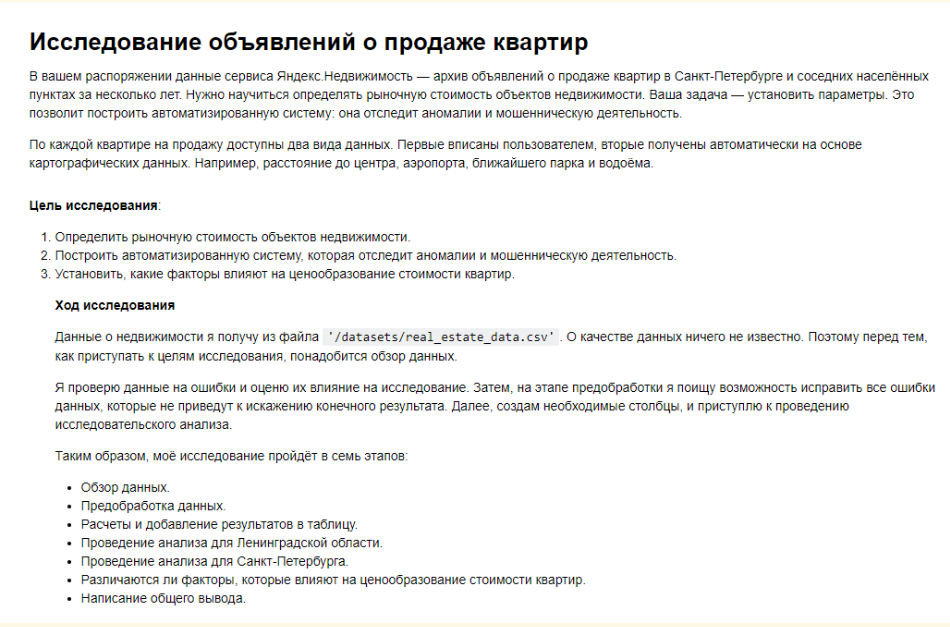

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

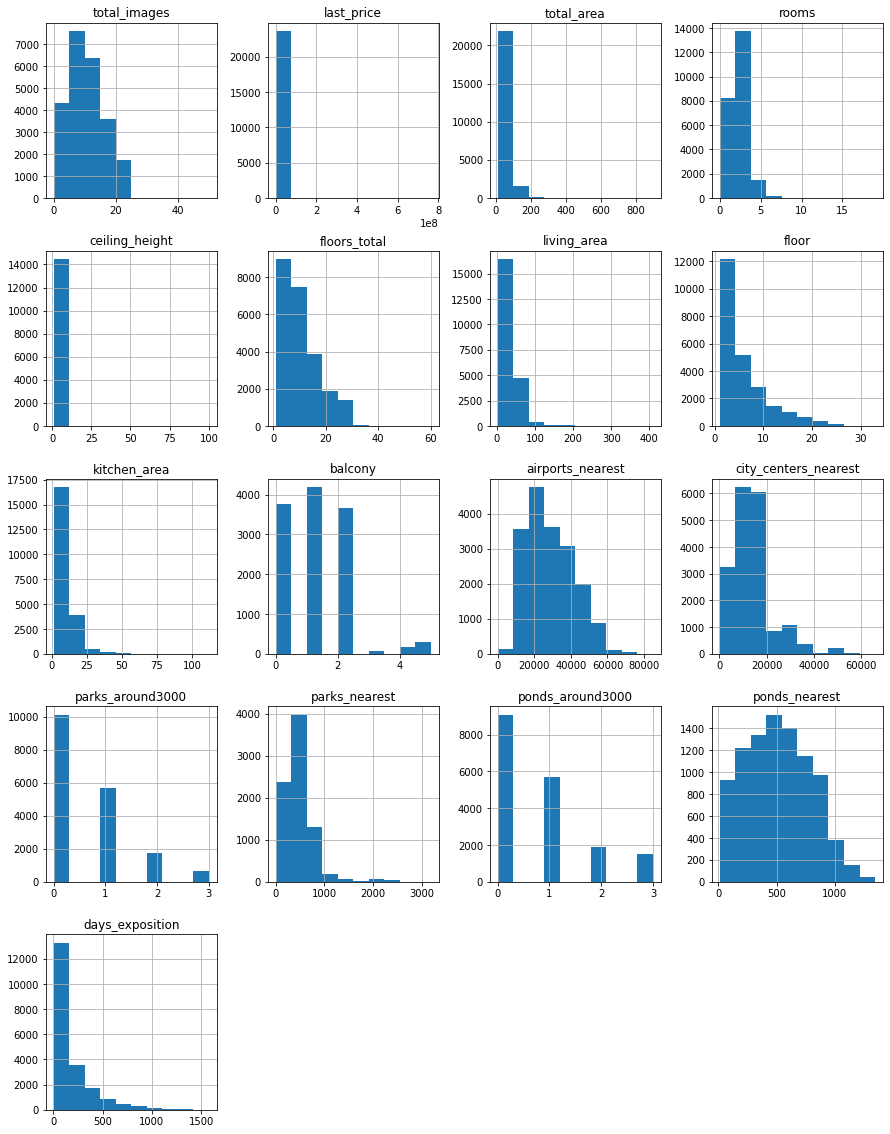

In [3]:
data.hist(figsize=(15, 20))

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Всего 23699 значений, из них:

ceiling_height = 9195, треть значений пропущена в высоте потолков, оставим Null

floors_total = 86, пропущено очень мало значений, оставим Null, они на не помешают

living_area = 1903, оставим Null

is_apartament = 20924, почти все значения пропущены, нужно определять апартаменты это или нет и присваивать True или False

kitchen_area = 2278, если это студия, то оставим Null и наоборот

balcony = 11519, заполним 0, потому что скорее всего Null говорить что там нет балконов

locality_name = 49, мало пропусков, оставим Null

airports_nearest = 5542, null говорит о том что аэропортов рядом нет, так что оставим null

city_center_nearest = 5519, оставим null

parks_around3000 = 5518, в ближайших 3000 метрах парков нет, оставим null

ponds_nearest = 14589, рядом прудов нет, отсавим null

days_exposition = 3181, не опубликовали объявления, оставим Null

In [5]:
data['balcony'] = data['balcony'].fillna(0) #заполнили значение null балконов на 0
data['is_apartment'] = data['is_apartment'].fillna('False') #заполнили значения апартаментов
data['locality_name'].dropna(inplace=True) #удаляем строки с null
data['floors_total'].dropna(inplace=True) 

### Предобработка данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

last_price заменить на integer, потому что там целые числа

first_day_exposition поменять на datetime

floors_total в int

balcony в int

day_exposition в int

is_apartment в boolean

In [7]:
change_columns_names = ['last_price', 'floors_total', 'balcony', 'days_exposition']
try:
    for i in change_columns_names:
        data[i] = data[i].astype('int')
    data['is_apartment'] = data['is_apartment'].map({'False' : False, 'True' : True})
except:
    print('already done')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d %H:%M:%S')
data.info()

already done
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  bal

#### Уникальные значения

 1.Приводим все к нмжнему регистру
 
 2.Меняем все "ё" на "е"
 
 3.Меняем "городской поселок" на "поселок городского типа"

In [8]:
print(data['locality_name'].unique())
data['locality_name'].unique().shape[0]

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

365

In [9]:
data['locality_name'] = data['locality_name'].str.lower() #1
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') #2
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа') #3
data['locality_name'].unique().shape[0]

324

#### Проверим наличие явных дубликатов

In [10]:
data.duplicated().sum()

0

#### Наличие неявных дупликатов не выявил

#### Устранение выбросов

In [11]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


`last_price` - 1 квартира меньше 100.000 - нормально, 225 квартир меньше 1.000.000 - нормально, 37 квартир стоимостью больше 100.000.000 - убираем. 

<AxesSubplot:title={'center':'last_price'}, ylabel='Frequency'>

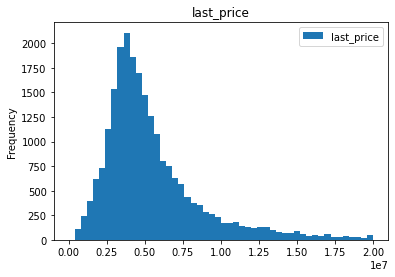

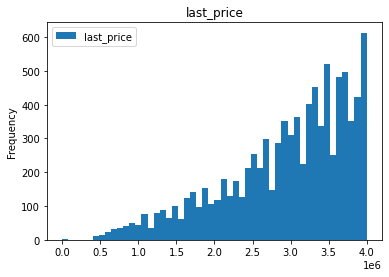

In [12]:
data.plot(kind='hist', y='last_price', bins=50, range=(0, 2e+07), title='last_price')
data.plot(kind='hist', y='last_price', bins=50, range=(0, 4e+06), title='last_price')

In [13]:
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью меньше 100.000:', data.query('last_price < 1e+05')['last_price'].count())
print('Квартир стоимостью меньше 1.000.000:', data.query('last_price < 1e+06')['last_price'].count())
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())

data.drop(index=data.query('last_price > 1e+08').index,inplace=True)
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())


Квартир стоимостью 0: 0
Квартир стоимостью меньше 100.000: 1
Квартир стоимостью меньше 1.000.000: 225
Квартир стоимостью больше 100.000.000: 37
Квартир стоимостью больше 100.000.000: 0


<AxesSubplot:title={'center':'last_price'}, ylabel='Frequency'>

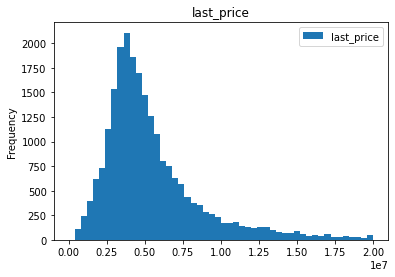

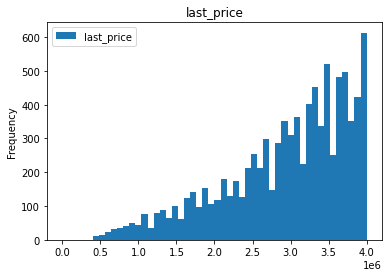

In [14]:
data.plot(kind='hist', y='last_price', bins=50, range=(0, 2e+07), title='last_price')
data.drop(index=data.query('last_price < 1e+05').index, inplace=True)
data.plot(kind='hist', y='last_price', bins=50, range=(0, 4e+06), title='last_price')

`total_area` - удалим квартиры с площадью более 500 кв.м., потому что их немного и лучше удалить

Квартир площадью более 500 кв.м.: 3
Квартир площадью более 260 кв.м.: 74


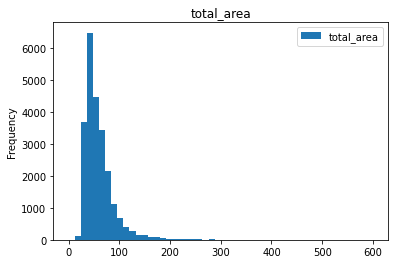

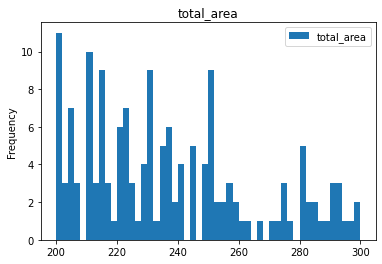

In [15]:
data.plot(kind='hist', y='total_area', bins=50, title='total_area', range=(0, 600))
data.plot(kind='hist', y='total_area', bins=50, title='total_area', range=(200, 300))

print('Квартир площадью более 500 кв.м.:',data.query('total_area > 500')['total_area'].count())
print('Квартир площадью более 260 кв.м.:',data.query('total_area > 260')['total_area'].count())


<AxesSubplot:title={'center':'total_area'}, ylabel='Frequency'>

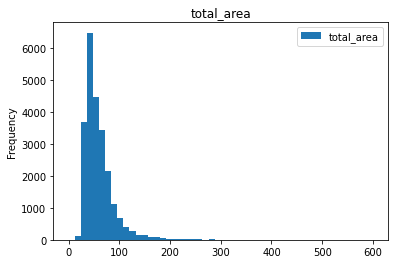

In [16]:
data.drop(index=data.query('total_area > 500').index,inplace=True) #удаляем ненужные данные
data.plot(kind='hist', y='total_area', bins=50, title='total_area', range=(0, 600))

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

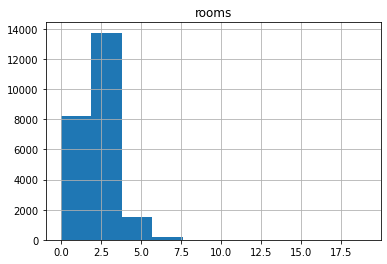

In [17]:
data.hist('rooms')

`rooms` - есть много нулевых значений, нужно проверить, может это студии или свободная планировка

In [18]:
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())
print('Квартиры без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count()) 
print('Квартиры без комнат и свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())
print('Квартиры без комнат и не свободная планировка:',data.query('rooms == 0 and ~open_plan and ~studio')['rooms'].count())
data.drop(index=data.query('rooms > 7').index,inplace=True)

Квартиры без комнат: 197
Квартиры без комнат и студии: 138
Квартиры без комнат и свободная планировка: 59
Квартиры без комнат и не свободная планировка: 0


Да, как и предполагали, 0 комнат - это возможно.

Также удалили значения больше 7 комнат, такое возожно, но лучше их убрать.

`ceiling_height` - выоста потолков
- ниже 2.5 метров - невозможно, поэтому удалим
- обычная высота потолков - 2,5 - 4 метров
- скорее всего значение 25-40 метров являются опечаткой и они следуют значениям 2.5 - 4 метров
- высота потолков выше 50 метров - является выбросом

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

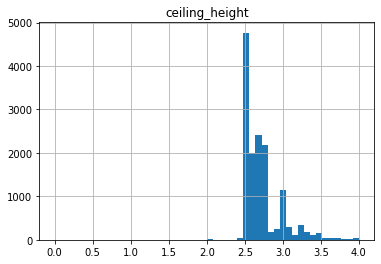

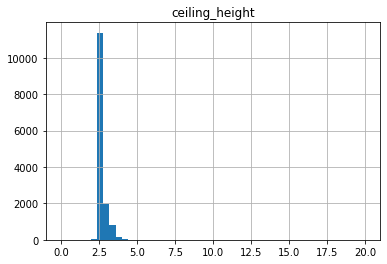

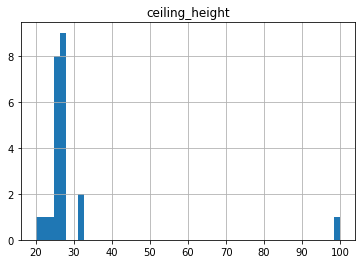

In [19]:
data.hist('ceiling_height', bins=50, range=(0,4))
data.hist('ceiling_height', bins=50, range=(0, 20))
data.hist('ceiling_height', bins=50, range=(20, 100))

In [20]:
print('с потолками до 2.5м: ' + str(data.query('ceiling_height < 2.5')['ceiling_height'].count()))
print('с потолками от 2.5 до 4м: ' + str(data.query('ceiling_height > 2.5 and ceiling_height <= 4')['ceiling_height'].count()))
print('с потолками от 4 до 5м: ' + str(data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count()))
print('с потолками от 5 до 25м: ' + str(data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count()))
print('с потолками от 25м до 40м: ' + str(data.query('ceiling_height >= 25 and ceiling_height <= 40')['ceiling_height'].count()))
print('с потолками от 40м до 50м: ' + str(data.query('ceiling_height > 40 and ceiling_height < 50')['ceiling_height'].count()))
print('с потолками от 50м: ' + str(data.query('ceiling_height >= 50')['ceiling_height'].count()))

с потолками до 2.5м: 73
с потолками от 2.5 до 4м: 10800
с потолками от 4 до 5м: 36
с потолками от 5 до 25м: 14
с потолками от 25м до 40м: 19
с потолками от 40м до 50м: 0
с потолками от 50м: 1


In [21]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)
data.drop(index=data.query('ceiling_height > 40').index,inplace=True)
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 40)]['ceiling_height']/10)

<AxesSubplot:title={'center':'0 - 20'}, ylabel='Frequency'>

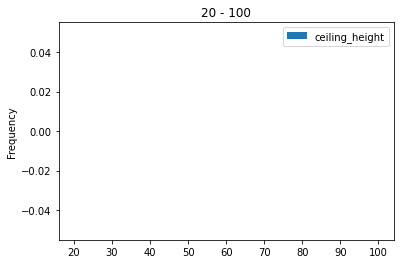

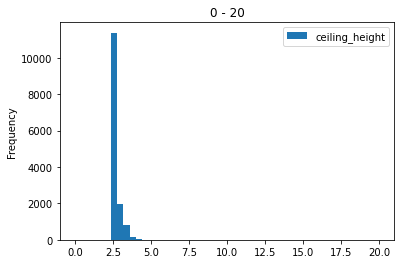

In [22]:
data.plot(kind='hist', y = 'ceiling_height', bins=50, range=(20,100), title='20 - 100')
data.plot(kind='hist', y = 'ceiling_height', bins=50, range=(0,20), title='0 - 20')

`floors_total` - есть немного квартир площадью менее 10 кв.м. - похоже на выбросы
Также следует отбросить квартиры с площадью больше 200 кв.м., так как их мало и лучше от них избавиться  

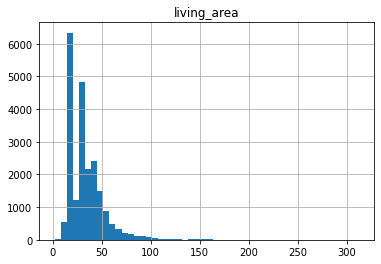

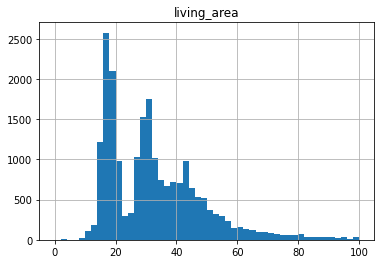

In [23]:
data.hist('living_area', bins=50);
data.hist('living_area', bins=50, range=(0,100));

In [24]:
print('меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('больше общей: ',data.query('living_area > total_area')['living_area'].count())
print('больше 200 кв.м.: ',data.query('living_area > 200')['living_area'].count())

меньше 10 кв.м.:  25
больше общей:  0
больше 200 кв.м.:  12


In [25]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

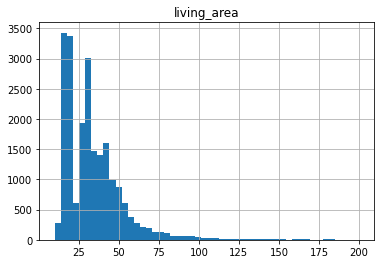

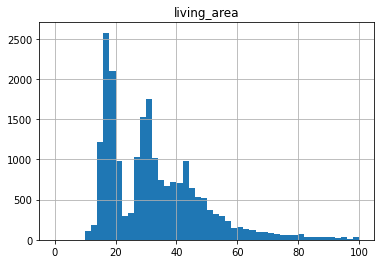

In [26]:
data.hist('living_area', bins=50);
data.hist('living_area', bins=50, range=(0,100));

`floor` - нет нулевых и нет слишком больших значений, поэтому оставим все как есть

In [27]:
print('Отсутствуют этажи',data.query('floor == 0')['floor'].count())
print('Больше 30 этажей',data.query('floor > 30')['floor'].count())

Отсутствуют этажи 0
Больше 30 этажей 3


array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

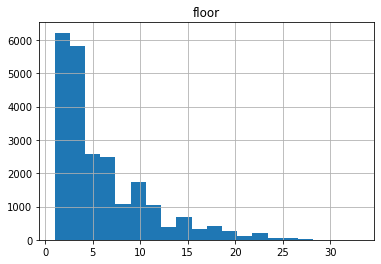

In [28]:
data.hist('floor', bins=20)

`kitchen_area` - площадь кухни
Удалим строки со значением площади кухонь меньше 2кв.м. и больше 50кв.м.

In [29]:
print('Площадь кухни меньше 5 кв.м.: ',data.query('kitchen_area < 5')['living_area'].count())
print('Площадь кухни меньше 2 кв.м.: ',data.query('kitchen_area < 2')['living_area'].count())
print('Площадь кухни 5 кв.м.: ',data.query('kitchen_area == 5')['living_area'].count())
print('Площадь кухни больше 50 кв.м.: ',data.query('kitchen_area > 50')['living_area'].count())
print('Площадь кухни больше общей: ',data.query('kitchen_area > total_area')['living_area'].count())

Площадь кухни меньше 5 кв.м.:  102
Площадь кухни меньше 2 кв.м.:  1
Площадь кухни 5 кв.м.:  351
Площадь кухни больше 50 кв.м.:  33
Площадь кухни больше общей:  0


In [30]:
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

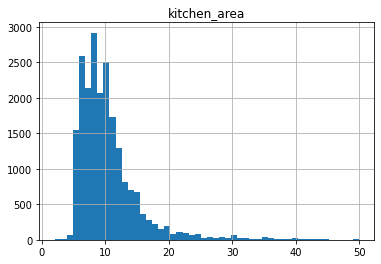

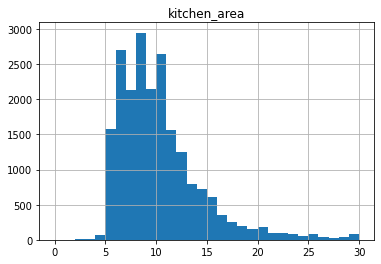

In [31]:
data.hist('kitchen_area', bins=50);
data.hist('kitchen_area', bins=30, range=(0,30));

`balcony` - все выглядит адекватным

array([[<AxesSubplot:title={'center':'balcony'}>]], dtype=object)

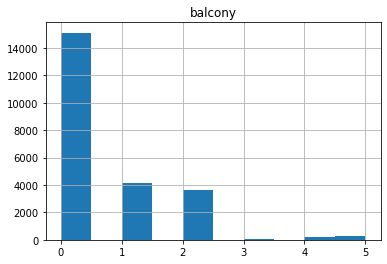

In [32]:
data.hist('balcony', bins=10)

`days_exposition` - выглядит нормально, но значения больше 3 лет - удалим

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

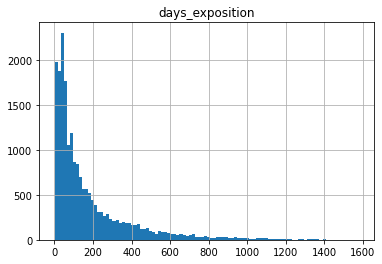

In [33]:
data.hist('days_exposition', bins=100)

In [34]:
print('Объявление не было оопубликовано: ',data.query('days_exposition == 0')['days_exposition'].count())
print('Объявлению больше 3 лет: ',data.query('days_exposition > 365*3')['days_exposition'].count())

data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

Объявление не было оопубликовано:  0
Объявлению больше 3 лет:  165


`airports_nearest` - выбивается квартира с маленьким растоянием до аэропорта, следует ее удалить

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

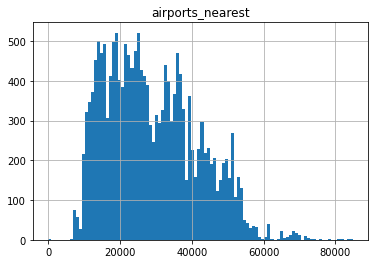

In [35]:
data.hist('airports_nearest', bins=100)

In [36]:
data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)

Остальные столбцы выглядат нормально и не имеют выбросов
- `city_centers_nearest`
- `parks_around3000`
- `parks_nearest`
- `ponds_around3000`
- `ponds_nearest`

array([[<AxesSubplot:title={'center':'ponds_nearest'}>]], dtype=object)

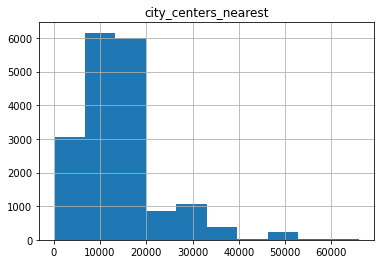

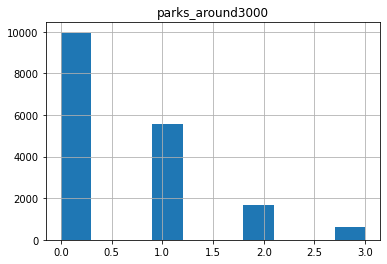

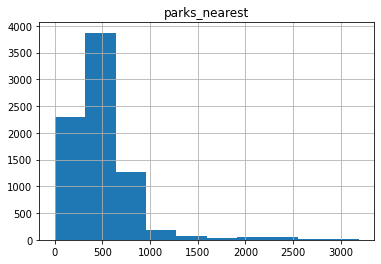

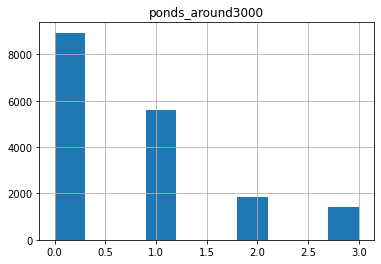

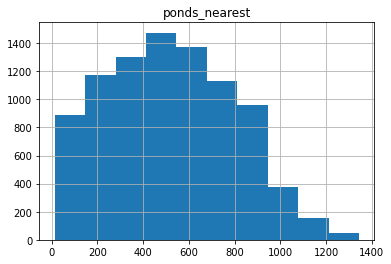

In [37]:
data.hist('city_centers_nearest')
data.hist('parks_around3000')
data.hist('parks_nearest')
data.hist('ponds_around3000')
data.hist('ponds_nearest')

In [38]:
data.reset_index(drop=True,inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23269 entries, 0 to 23268
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23269 non-null  int64         
 1   last_price            23269 non-null  int64         
 2   total_area            23269 non-null  float64       
 3   first_day_exposition  23269 non-null  datetime64[ns]
 4   rooms                 23269 non-null  int64         
 5   ceiling_height        14161 non-null  float64       
 6   floors_total          23185 non-null  float64       
 7   living_area           21398 non-null  float64       
 8   floor                 23269 non-null  int64         
 9   is_apartment          23269 non-null  object        
 10  studio                23269 non-null  bool          
 11  open_plan             23269 non-null  bool          
 12  kitchen_area          21029 non-null  float64       
 13  balcony         

In [40]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23269.000000,2.326900e+04,23269.000000,23269.000000,14161.000000,23185.000000,21398.000000,23269.000000,21029.000000,23269.000000,17790.000000,17810.000000,17811.000000,7853.000000,17811.000000,8877.000000,20129.000000
mean,9.861876,6.108890e+06,59.077140,2.048004,2.718538,10.711063,33.750936,5.904078,10.375841,0.592075,28822.583249,14267.860584,0.603503,490.491023,0.762506,520.325898,171.424164
std,5.674370,5.925284e+06,30.361778,1.020323,0.252113,6.604607,19.139593,4.892588,5.116384,0.959019,12670.952147,8577.590461,0.795832,340.128745,0.932759,277.843231,197.202647
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,1.000000,10.000000,1.000000,2.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18516.500000,9413.000000,0.000000,288.000000,0.000000,297.000000,44.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.050000,0.000000,26803.000000,13149.000000,0.000000,455.000000,0.000000,504.000000,93.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.000000,8.000000,12.000000,1.000000,37350.250000,16318.750000,1.000000,612.000000,1.000000,733.000000,224.000000
max,50.000000,9.900000e+07,494.100000,7.000000,4.000000,60.000000,200.000000,33.000000,50.000000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,1344.000000,1095.000000


In [41]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Вывод:
 - Исправил типы данных
 
 - Избавился от дубликатов
 
 - Устранил выбросы

### Посчитайте и добавьте в таблицу новые столбцы

<b>Цена одного квадратного метра </b>

In [42]:
data['cost_per_one_metr'] = data['last_price'] / data['total_area']

<b> День публикации объявления </b>

In [43]:
data['weekday'] = data['first_day_exposition'].dt.weekday

<b> Месяц публикации объявления </b>

In [44]:
data['month'] = data['first_day_exposition'].dt.month

<b> Год публикации объявления </b>

In [45]:
data['year'] = data['first_day_exposition'].dt.year

<b> Тип этажа квартиры </b>

In [46]:
def floors_descr(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_name'] = data.apply(floors_descr, axis = 1)

<b> Расстояние в км до центра города </b>

In [47]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('Int32')

In [48]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_one_metr,weekday,month,year,floor_name,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8


### Проведите исследовательский анализ данных

In [49]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_one_metr,weekday,month,year,city_centers_nearest_km
count,23269.000000,2.326900e+04,23269.000000,23269.000000,14161.000000,23185.000000,21398.000000,23269.000000,21029.000000,23269.000000,...,17811.000000,7853.000000,17811.000000,8877.000000,20129.000000,23269.000000,23269.000000,23269.000000,23269.000000,17810.000000
mean,9.861876,6.108890e+06,59.077140,2.048004,2.718538,10.711063,33.750936,5.904078,10.375841,0.592075,...,0.603503,490.491023,0.762506,520.325898,171.424164,98191.449578,2.572607,6.399630,2017.386867,14.261426
std,5.674370,5.925284e+06,30.361778,1.020323,0.252113,6.604607,19.139593,4.892588,5.116384,0.959019,...,0.795832,340.128745,0.932759,277.843231,197.202647,42180.520133,1.789443,3.487328,1.020240,8.585143
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,1.000000,10.000000,1.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,7962.962963,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,297.000000,44.000000,76517.150396,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.050000,0.000000,...,0.000000,455.000000,0.000000,504.000000,93.000000,94818.652850,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.000000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,733.000000,224.000000,113772.455090,4.000000,10.000000,2018.000000,16.000000
max,50.000000,9.900000e+07,494.100000,7.000000,4.000000,60.000000,200.000000,33.000000,50.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1095.000000,848484.848485,6.000000,12.000000,2019.000000,66.000000


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

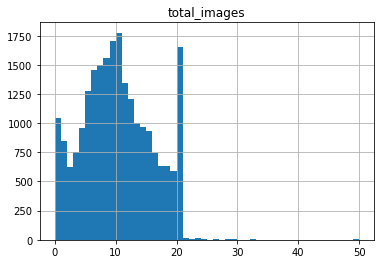

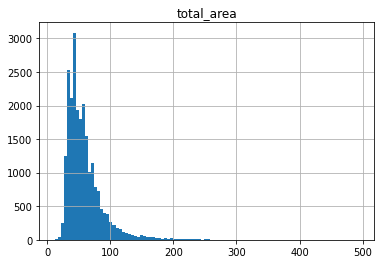

In [50]:
data.hist('total_images', bins=50)
data.hist('total_area', bins=100)

<AxesSubplot:title={'center':'Распределение по этажам'}, xlabel='floor_name', ylabel='count'>

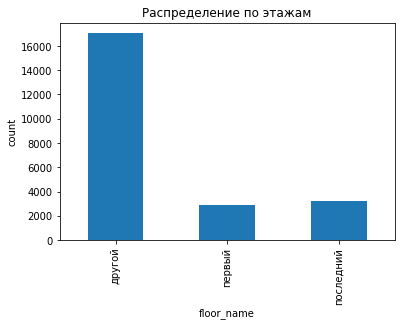

In [76]:
data.groupby('floor_name')['floor_name'].count().plot(kind='bar', ylabel = 'count', title='Распределение по этажам')

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

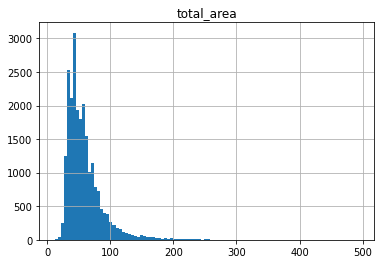

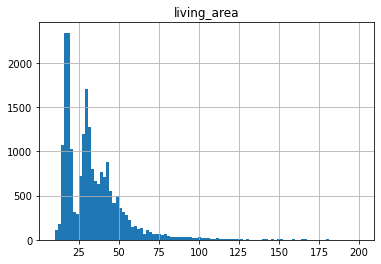

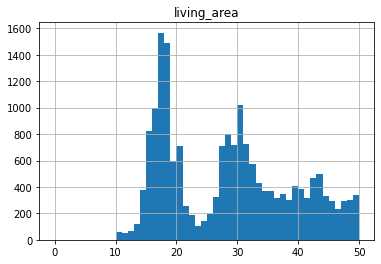

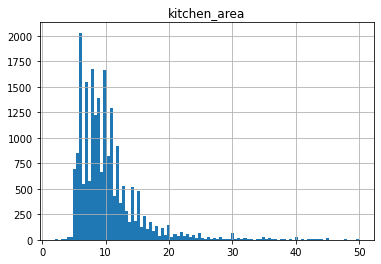

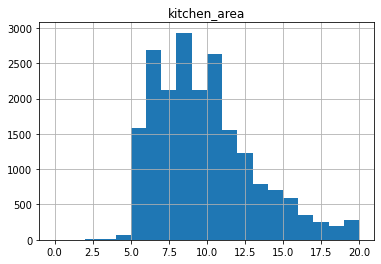

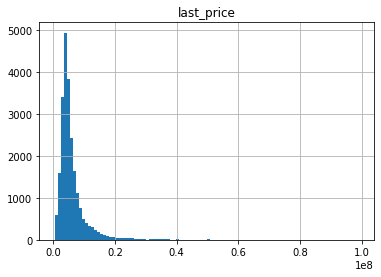

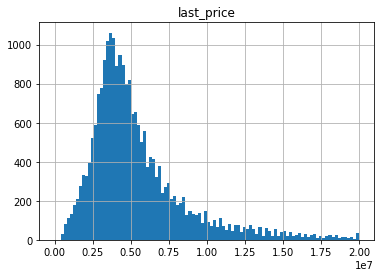

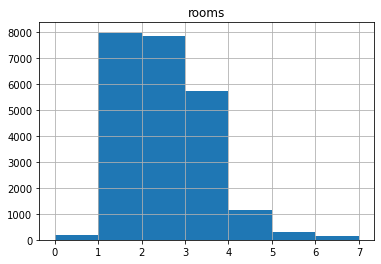

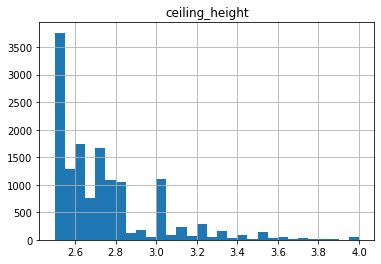

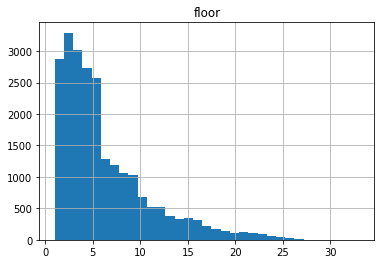

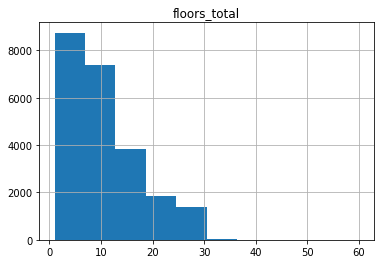

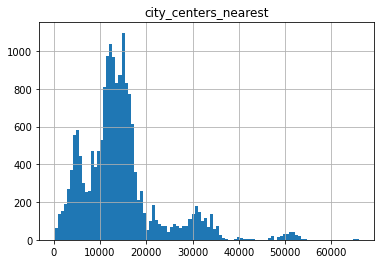

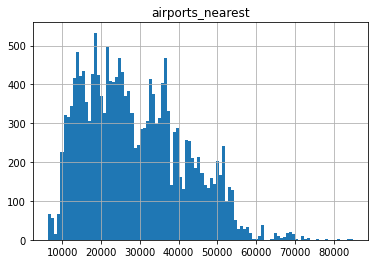

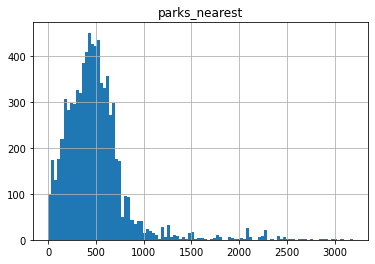

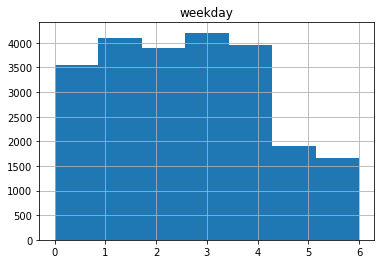

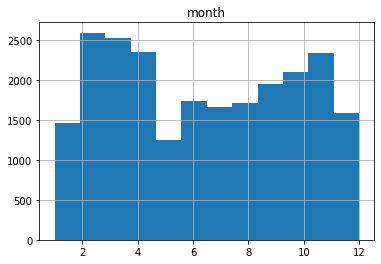

In [75]:
data.hist('total_area', bins=100)

data.hist('living_area', bins=100)
data.hist('living_area', bins=50, range=(0,50))

data.hist('kitchen_area', bins=100)
data.hist('kitchen_area', bins=20, range=(0,20))

data.hist('last_price', bins=100)
data.hist('last_price', bins=100, range=(0,2e+07))

data.hist('rooms', bins=data['rooms'].max())

data.hist('ceiling_height', bins=30)

data.hist('floor', bins=data['floor'].max())

data.hist('floors_total')

data.hist('city_centers_nearest', bins=100)

data.hist('airports_nearest', bins=100)

data.hist('parks_nearest', bins=100)

data.hist('weekday', bins=7)

data.hist('month', bins=12)


<b> Исследование, как быстро продавались квартиры </b>

Среднее: 171.42416414128868
Медиана: 93.0


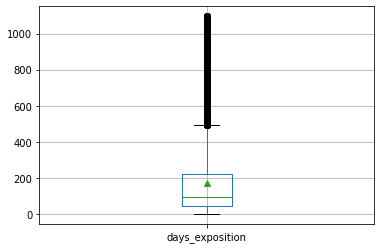

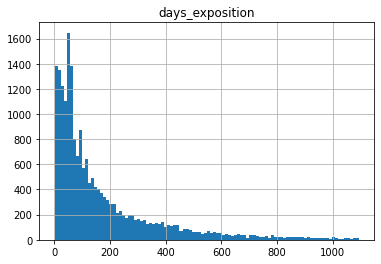

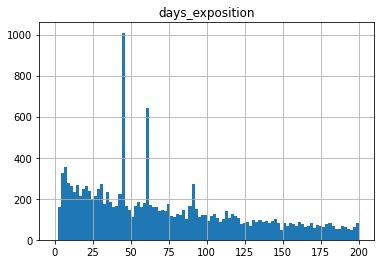

In [72]:
data.boxplot('days_exposition', showmeans=True)
data.hist('days_exposition', bins=100)
data.hist('days_exposition', bins=100, range=(0,200))


print('Среднее:',data['days_exposition'].mean())
print('Медиана:',data['days_exposition'].median())

Среднее кол-во дней 171 день, но по медиане 93 дня. Такая большая разница из-за большого кол-ва квартир, которые продавались более 400 дней.
Я считаю, что быстрые продажи лучше считать до нижнего квартиля, то есть до 40 дней, а необычно долгими - свыше верхнего квартиля, свыше 220 дней.

<b> Какие факторы больше всего влияют на общую (полную) стоимость объекта? </b>

In [65]:
data['floor_name_num'] = data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
)

necessary_series = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_name_num',
                  'weekday',
                  'month',
                  'year']
for i in necessary_series:
    print(f"Корреляция между last_price и {i}: {data['last_price'].corr(data[i]):.1}")

Корреляция между last_price и total_area: 0.8
Корреляция между last_price и living_area: 0.7
Корреляция между last_price и kitchen_area: 0.6
Корреляция между last_price и rooms: 0.5
Корреляция между last_price и floor_name_num: 0.09
Корреляция между last_price и weekday: -0.0009
Корреляция между last_price и month: 0.006
Корреляция между last_price и year: -0.04


Относительно корреляции можно понять на сколько зависит цена от определенного факторы: чем корреляция ближе к 1, тем больше общая цена зависит от этого фактора.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

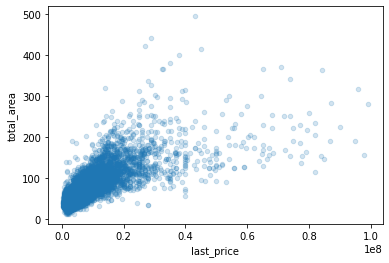

In [54]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2) #зависимость от общей площади

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

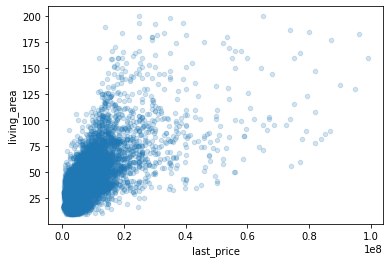

In [55]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2) #зависимость от жилой площади

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

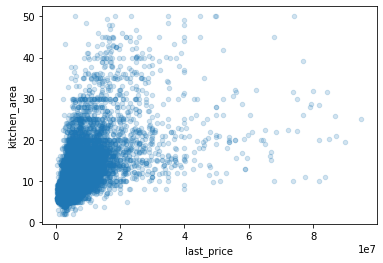

In [56]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2) #зависимость от площади кухни

<AxesSubplot:xlabel='rooms'>

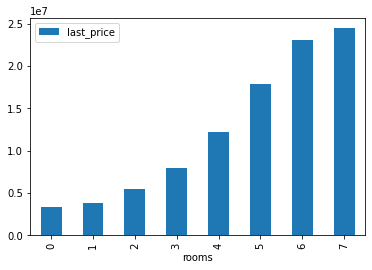

In [57]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar') #зависимость от кол-ва комнат

<AxesSubplot:ylabel='floor_name'>

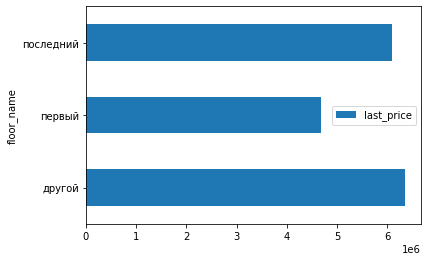

In [58]:
data.pivot_table(index='floor_name',values='last_price').plot(y='last_price', kind='barh') #зависимость от типа этажа

<AxesSubplot:title={'center':'median'}, xlabel='weekday'>

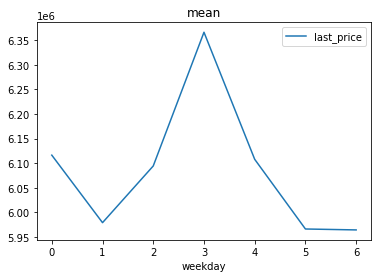

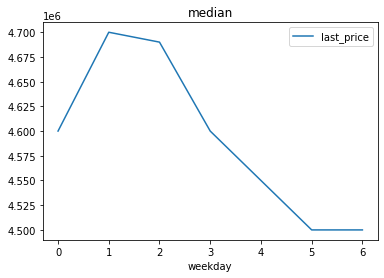

In [59]:
data.pivot_table(index='weekday',values='last_price').plot(y='last_price', kind='line', title='mean') #зависимость от дня размещения
data.pivot_table(index='weekday',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

<AxesSubplot:title={'center':'median'}, xlabel='month'>

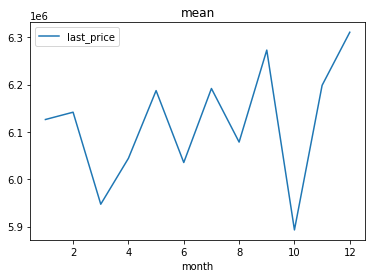

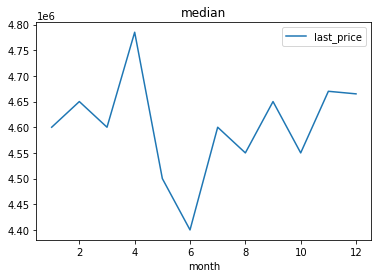

In [60]:
data.pivot_table(index='month',values='last_price').plot(y='last_price', kind='line', title='mean') #зависимость от месяцы размещения
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

<AxesSubplot:title={'center':'median'}, xlabel='year'>

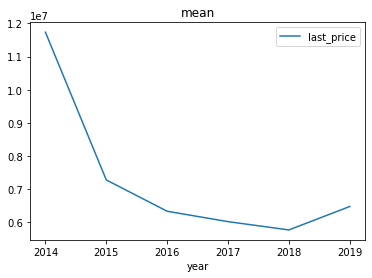

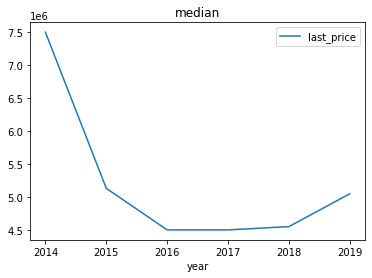

In [61]:
data.pivot_table(index='year',values='last_price').plot(y='last_price', kind='line', title='mean') #зависимость от года размещения
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

Больше всего на цену влияют общая площадь и жилая площадь, менее - кол-во комнат и площадь кухни

Цена практически не зависит от этажа и даты размещения

<b> Среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений </b>

,Цена за 1кв.м.
locality_name,
санкт-петербург,113133
пушкин,102898
деревня кудрово,92454
поселок парголово,90132
поселок мурино,85711
поселок шушары,78661
колпино,75329
гатчина,68746
всеволожск,68690


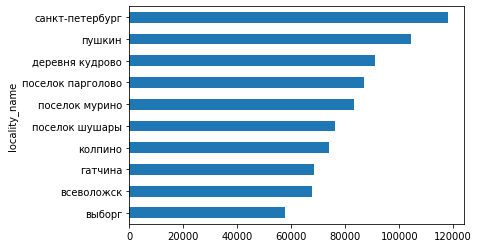

In [62]:
top = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top.pop('total_area_count')
top.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top = top.iloc[:10]
top['price_per_sq_m'] = top['last_price_sum']/top['total_area_sum']
top.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top['price_per_sq_m'].plot(kind='barh')

top_pivot = data['locality_name'].value_counts().head(10)
top_pivot_m = data.query('locality_name in (@top_pivot.index)').pivot_table(values='cost_per_one_metr', index='locality_name')
top_pivot_m = top_pivot_m.astype(int)
top_pivot_m.columns = ['Цена за 1кв.м.']
top_pivot_m.sort_values('Цена за 1кв.м.', ascending=False)

Самая дорогая недвижимость в Санкт-Петербурге и в ближайщих к ней городах, поселках и деревнях.

<b> Зависимость цены от расстояния до центра города </b>

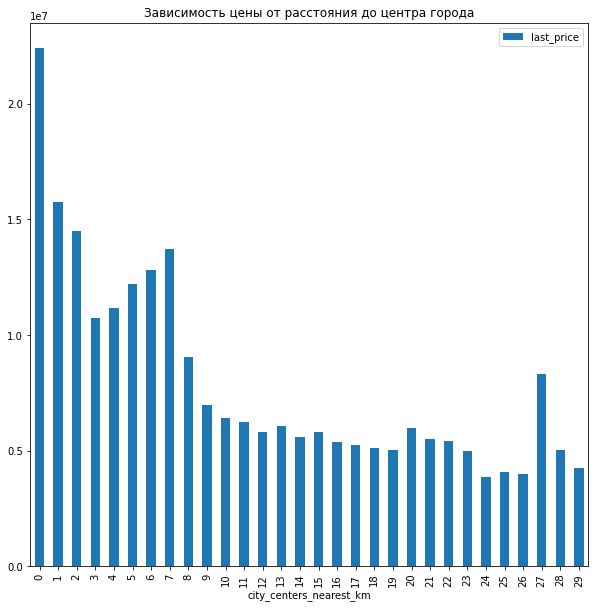

In [63]:

data[data['locality_name']=='санкт-петербург'].pivot_table(index='city_centers_nearest_km', values='last_price')\
    .plot(kind='bar', figsize=(10,10), title = 'Зависимость цены от расстояния до центра города');

1) Логично, но недвижимость с расстоянием до 1 км самая дорогая

2) Цены сильно упали на промежутке от 1 до 2 км

3) На промежутке от 3 до 7 км имели большой спад, но после постепенно поднимаются

4) От 8 до 26 км после сильного спада имеется ровное понижение цен

5) Заметен сильный пик на 27км, возможно там продавались элитные квартиры или тп



### Общий вывод

<b>1) </b> Данные были очищены от выбросов, и явных и неявных дубликатов 

<b>2) </b> Удалено некоторое кол-во дорогих квартир, чтобы данные в исследовании не испортились из-за больших цен

<b>3) </b> Были проведены исследования:

 - <b> Как быстро продавались квартиры? </b> 

<b>Вывод: </b>Среднее кол-во дней 171 день, но по медиане 93 дня. Такая большая разница из-за большого кол-ва квартир, которые продавались более 400 дней. Я считаю, что быстрые продажи лучше считать до медианы, то есть до 93 дней, а необычно долгими - свыше 171 дня.
 
 
 - <b> Какие факторы больше всего влияют на общую (полную) стоимость объекта? </b> 

<b>Вывод: </b>Больше всего на цену влияют общая площадь и жилая площадь, менее - кол-во комнат и площадь кухни. Цена практически не зависит от этажа и даты размещения
 
 
 - <b> Среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений </b> 

<b>Вывод: </b>Самая дорогая недвижимость в Санкт-Петербурге и в ближайщих к ней городах, поселках и деревнях.
 
 
 - <b> Зависимость цены от расстояния до центра города </b> 

<b>Вывод: </b>С большим отрывом лидирует недвижимость до 1км. Видим более низкие цены на недвижимость на расстоянии от 1 км. до 7 км. включительно. Далее цена спадает на расстоянии от 8 км. до 27 км. Также заметен пик на 27км, его сложно объяснить, возможно это недвижимость в элитном районе.